# Examen Módulo 2 - Montecarlo.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.

---
### Simulación Montecarlo usando Caminata aleatoria<font size='1'>(3.3 puntos)</font>

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A**, **B** y **C**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 2 de cada 3 operaciones cambia al estado **B**, el resto de casos cambia al estado **C**.
* Estando en el estado **B**, 3 de cada 5 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.
* Estando en el estado **C**, 4 de cada 5 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **C**.
Respresentado por el siguiente diagrama

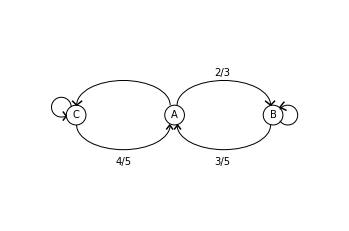

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

A = patches.Circle((0, 0), 0.1,fc='None',color='k')
B = patches.Circle((1, 0), 0.1,fc='None',color='k')
C = patches.Circle((-1,0), 0.1,fc='None',color='k')
AB = patches.Arc((0.5,   0.1 ), 0.95, 0.5,theta2=180,fc='None',color='k')
BA = patches.Arc((0.5,   -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
AC = patches.Arc((-0.52, 0.1 ), 0.95, 0.5,theta2=180,fc='None',color='k')
CA = patches.Arc((-0.52, -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
CC = patches.Arc((-1.15, 0.08), 0.2,  0.2,theta2=290,fc='None',color='k')
BB = patches.Arc((1.15,  0   ), 0.2,  0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(A)
ax.add_artist(B)
ax.add_artist(C)
ax.add_artist(AB)
ax.add_artist(BA)
ax.add_artist(AC)
ax.add_artist(CA)
ax.add_artist(BB)
ax.add_artist(CC)

plt.plot([0.925,0.975,1.015],[0.14,0.1,0.14],'k')    # AB
plt.plot([0.06,0.03,0],[-0.14,-0.1,-0.14],'k')       # BA
plt.plot([-0.945,-0.995,-1.035],[0.14,0.1,0.14],'k') # AC
plt.plot([-0.02,-0.05,-0.08],[-0.14,-0.1,-0.14],'k') # CA
plt.plot([1.13,1.07,1.11],[0.05,0.08,0.13],'k')      # BB
plt.plot([-1.13,-1.1,-1.13],[0.03,-0.01,-0.05],'k')  # CC

plt.text(-0.04,-0.02,'A')
plt.text(0.97,-0.02,'B')
plt.text(-1.04,-0.02,'C')
plt.text(0.4,0.4,'2/3')  # AB
plt.text(0.4,-0.5,'3/5') # BA
plt.text(-0.6,-0.5,'4/5') # CA

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Defina una función que permita simular el proceso antes descrito.

Si suponemos que el proceso inicia en el estado A

In [34]:
def cambiar_posicion():
    Posicion = ['A']
    OperacionesA = ['B','B','C']
    OperacionesB = ['B','B','A','A','A']
    OperacionesC = ['A','A','A','A','C']
    N_Operaciones = 100
    for i in range (N_Operaciones):
        if Posicion[-1] == 'A':
            Posicion.append(np.random.choice(OperacionesA))
        elif Posicion[-1] == 'B': 
            Posicion.append(np.random.choice(OperacionesB))
        elif Posicion[-1] == 'C': 
            Posicion.append(np.random.choice(OperacionesC))
    Posicion_final = 'La posición final es ' + Posicion[-1]
    return Posicion_final,len(Posicion)

cambiar_posicion()   

('La posición final es B', 101)

2. Si el proceso parte del estado **A**, y se ejecutan 100 operaciones. Usando el método Montecarlo con 1000 escenarios, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**?.

In [35]:
def cambiar_posicionM():
    Posicion = 'A'
    OperacionesA = ['B','B','C']
    OperacionesB = ['B','B','A','A','A']
    OperacionesC = ['A','A','A','A','C']
    N_Operaciones = 100
    for i in range (N_Operaciones):
        if Posicion == 'A':
            Posicion = (np.random.choice(OperacionesA))
        elif Posicion == 'B': 
            Posicion = (np.random.choice(OperacionesB))
        elif Posicion == 'C': 
            Posicion = (np.random.choice(OperacionesC))
    Posicion_final = 'La posición final es ' + Posicion
    return Posicion

cambiar_posicionM()   

'C'

In [36]:
Procesos = []
for i in range (10**3):
    Procesos.append(cambiar_posicionM())
Procesos.count('A'),Procesos.count('B'),Procesos.count('C')

(397, 440, 163)

In [37]:
Probabilidad_A = ((Procesos.count('A')) / 10**3)*100
Probabilidad_B = ((Procesos.count('B')) / 10**3)*100
Probabilidad_C = ((Procesos.count('C')) / 10**3)*100

In [38]:
P_B = 'La probabilidad de que el proceso termine en B es del ' + str(Probabilidad_B) + ' %'
P_B

'La probabilidad de que el proceso termine en B es del 44.0 %'

**Extra: Probabilidades de A y C**

In [39]:
P_A = 'La probabilidad de que el proceso termine en A es del ' + str(Probabilidad_A) + ' %'
P_C = 'La probabilidad de que el proceso termine en C es del ' + str(Probabilidad_C) + ' %'
P_A,P_C

('La probabilidad de que el proceso termine en A es del 39.7 %',
 'La probabilidad de que el proceso termine en C es del 16.3 %')

---
### Integración Montecarlo tipo 2 <font size='1'>(3.3 puntos)</font>
Encuentre el área de la región que cumpla
$$
e^{-0.05(x^2+y^2)}\sin(x^2+y^2)>0.5\;\,.
$$

1. Escriba la función que discrimine los puntos que satisfacen la restricción de la región a evaluar, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [40]:
import pandas as pd

In [41]:
def region(x,y):
    return (np.exp(-0.05*((x**2)+(y**2))))*(np.sin((x**2)+(y**2))) > 0.5

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

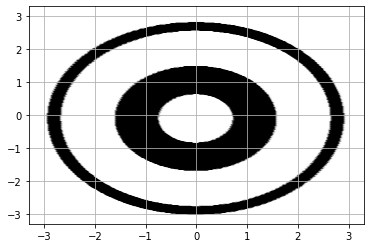

In [42]:
minx, maxx = -3,3
miny, maxy = -3,3#-0.5,1
x = np.linspace(minx,maxx,300)
y = np.linspace(miny,maxy,300)
X, Y = np.meshgrid(x,y)
plt.scatter(X,Y,c =~ region(X,Y), cmap = 'gray') # ~ es negación booleana
plt.grid()

3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [43]:
def montecarlo2(bernoulli,minx,maxx,miny,maxy,N):
    ux = np.random.uniform(minx,maxx,N)
    uy = np.random.uniform(miny,maxy,N)
    B = bernoulli(ux,uy)
    AR = (maxx-minx)*(maxy-miny)
    return AR*np.mean(B)

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [44]:
N = np.logspace(4,6,3).astype('int')
N

array([  10000,  100000, 1000000])

In [45]:
tabla = pd.DataFrame(index = N, columns = ['Aprox', 'E rel'])
for n in N:
    tabla.loc[n, 'Aprox'] = montecarlo2(region,minx,maxx,miny,maxy,n)
AR = (maxx-minx)*(maxy-miny)
th = tabla['Aprox']/AR
tabla['E rel'] = (1/np.sqrt(N))*(((1-th)/th)**0.5)
tabla

,Aprox,E rel
10000,10.962,0.015113
100000,10.78884,0.004834
1000000,10.916316,0.001516


---
### Probabilidad Precio-Umbral <font size='1'>(3.4 puntos)</font>

Suponga que desea invertir en **Spotify** o **Mercado Libre**. Evalúe la probabilidad de obtener un retorno del 10% en seis meses a partr del 23 de junio del presente año.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *pandas-datareader*. Donde los argumentos de entrada sean los nombres de las empresas y las fechas de inicio y fin a los cuales se obtendrán los datos.

In [46]:
import pandas_datareader.data as web
from datetime import date

In [47]:
def getClose(names, start, end):
    return web.DataReader(names,'yahoo',start,end)

2. Obtenga los precios de cierre ajustados para Spotify y Mercado Libre desde el 22 de junio de 2020 al 22 de junio de 2022.

In [48]:
names = ['SPOT','MELI'] # Spotify, Mercado libre
start = '2020-06-22'
end = '2022-06-22'
data = getClose(names,start,end)['Adj Close']
data.head() # Mostrar los primeros datos

Symbols,SPOT,MELI
Date,,
2020-06-22,236.059998,984.539978
2020-06-23,241.759995,977.489990
2020-06-24,242.860001,953.770020
2020-06-25,267.470001,971.440002
2020-06-26,264.950012,973.169983


<AxesSubplot:xlabel='Date'>

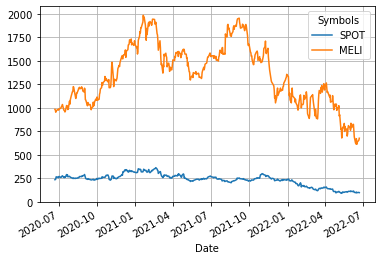

In [49]:
data.plot(grid = True)

3. Calcule el rendimiento simple para ambas empresas.

In [51]:
R = data.pct_change().dropna()
R.head()

Symbols,SPOT,MELI
Date,,
2020-06-23,0.024146,-0.007161
2020-06-24,0.004550,-0.024266
2020-06-25,0.101334,0.018526
2020-06-26,-0.009422,0.001781
2020-06-29,0.000717,0.007871


In [53]:
R.tail()

Symbols,SPOT,MELI
Date,,
2022-06-15,0.074452,0.091321
2022-06-16,-0.071191,-0.089179
2022-06-17,0.014512,0.036755
2022-06-21,0.021457,0.033815
2022-06-22,-0.020414,0.031521


In [57]:
R2 = ((data-data.shift())/data.shift()).dropna()
R2.head()

Symbols,SPOT,MELI
Date,,
2020-06-23,0.024146,-0.007161
2020-06-24,0.004550,-0.024266
2020-06-25,0.101334,0.018526
2020-06-26,-0.009422,0.001781
2020-06-29,0.000717,0.007871


In [58]:
R2.tail()

Symbols,SPOT,MELI
Date,,
2022-06-15,0.074452,0.091321
2022-06-16,-0.071191,-0.089179
2022-06-17,0.014512,0.036755
2022-06-21,0.021457,0.033815
2022-06-22,-0.020414,0.031521


4. Escriba una función que, dando como argumentos:
* la media,
* la desviación estandar,
* la fecha de inicio,
* la fecha del fin de simulación y
* número de escenarios a simular;

regrese en un _DataFrame_ de _pandas_ cuyo índice sea el rango de fechas dadas como argumentos.

In [63]:
pd.date_range?

In [71]:
def sim(me,std,inicio,fin,N):
    fechas = pd.date_range(inicio,fin)
    R = np.random.normal(me,std,(len(fechas),N))
    return pd.DataFrame(data = R,index = fechas)

5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 23 de junio de 2022 al 23 de diciembre de 2022.

In [76]:
SPOT_R = sim(R['SPOT'].mean(),
            R['SPOT'].std(),
             '2022-06-23', # Fecha de inicio
            '2022-12-23',  # Días a simular
            100000) # Escenarios
MELI_R = sim(R['MELI'].mean(),
            R['MELI'].std(),
            '2022-06-23',
            '2022-12-23',
            100000)

In [77]:
SPOT_R

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-06-23,0.024085,-0.029749,0.028338,-0.014444,-0.035522,0.031427,0.015344,0.011521,-0.030690,-0.001943,...,-0.087749,0.021174,-0.000540,-0.007709,-0.003153,-0.003885,0.060484,-0.060809,0.038242,-0.054937
2022-06-24,0.036969,-0.026250,-0.009534,0.010621,0.011848,-0.003347,-0.006524,-0.037900,0.032884,-0.000168,...,-0.007858,-0.034577,-0.044500,0.051321,-0.020276,-0.001476,0.044546,0.000250,-0.037087,-0.012974
2022-06-25,0.013402,-0.006786,-0.020921,-0.054623,-0.033479,0.005669,-0.003379,-0.005591,-0.010162,0.010008,...,0.015152,-0.000174,-0.009653,0.015809,0.035804,-0.001131,-0.013223,-0.040415,0.036454,-0.024489
2022-06-26,0.010121,-0.033750,0.021662,0.024286,0.035814,-0.007572,0.002327,0.029743,-0.001809,-0.000943,...,-0.030142,-0.016861,-0.089573,0.035337,-0.001731,-0.037479,0.001392,-0.016895,0.008206,-0.005612
2022-06-27,-0.016862,-0.028954,0.024223,0.001126,0.040294,0.066910,-0.009898,0.017426,-0.024485,0.009933,...,-0.004524,-0.043210,-0.009460,0.009170,-0.020857,-0.023416,0.054929,0.007474,-0.008050,-0.006965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,-0.043625,0.026102,-0.019105,-0.031462,-0.002568,-0.013530,0.000365,-0.019158,0.028631,0.007124,...,-0.070075,-0.013455,0.039782,0.039848,-0.008649,0.033802,0.022492,-0.008437,-0.016362,0.008417
2022-12-20,-0.023616,0.028425,0.045019,0.011644,0.025940,-0.001093,-0.022606,-0.020494,-0.040113,-0.063434,...,0.008318,0.054174,-0.040144,-0.041847,-0.020130,0.020380,0.024390,-0.026329,0.012802,-0.016792
2022-12-21,0.043601,0.081337,0.075315,0.029348,-0.019188,-0.005915,-0.006382,-0.024023,0.051072,-0.003985,...,0.070639,0.003822,-0.004386,0.006887,0.025509,-0.020843,-0.011237,0.071136,0.034970,0.033299
2022-12-22,-0.066804,-0.017633,0.069471,-0.007591,-0.019175,-0.015741,0.027893,0.010704,-0.012944,-0.030075,...,-0.000352,-0.013441,0.012206,-0.028201,-0.023700,0.011961,0.001756,0.043405,-0.024629,0.040605


In [78]:
MELI_R

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-06-23,0.044785,0.030576,-0.037369,0.005394,0.058570,0.053803,-0.044651,0.070416,0.078300,-0.013907,...,0.010029,0.033801,-0.012967,-0.019099,-0.047350,0.033540,-0.003106,0.024530,0.021350,0.005387
2022-06-24,-0.013531,-0.004545,0.006259,0.009144,0.020570,0.006302,0.027901,-0.077468,0.089273,-0.004634,...,0.004929,-0.022257,-0.013917,-0.053871,0.007777,-0.003869,0.010604,0.023441,-0.039740,0.015941
2022-06-25,-0.003167,-0.092622,0.000189,-0.023911,-0.041574,0.010670,0.005598,-0.085741,0.001458,0.016034,...,0.071396,0.004143,0.008342,0.044943,-0.023726,-0.023156,0.033829,0.023143,-0.081743,-0.035891
2022-06-26,0.021969,-0.001399,0.031986,0.023986,-0.007125,-0.013780,-0.025658,-0.058859,-0.076836,-0.023749,...,0.029112,-0.042756,-0.097472,-0.020856,-0.033582,-0.025702,0.026572,0.022459,-0.002922,-0.056553
2022-06-27,-0.067057,-0.049714,0.071548,0.010649,0.022763,-0.026300,-0.001562,-0.076070,0.033445,0.025889,...,0.000780,0.037168,-0.049127,0.005720,0.000214,0.014685,0.106758,0.082505,-0.052172,-0.022923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,0.030145,-0.024979,-0.007950,0.029342,0.009815,-0.044940,0.031551,-0.007889,-0.027642,0.039626,...,-0.068863,0.017045,0.060905,0.032025,-0.040509,-0.053078,-0.018389,0.026625,0.015815,0.003037
2022-12-20,-0.020341,-0.055165,0.012795,-0.051982,-0.051181,-0.073706,-0.009861,0.058297,0.013963,0.001328,...,-0.026267,-0.056223,-0.012843,-0.016862,-0.000346,0.043153,-0.027523,-0.024834,-0.034129,-0.034500
2022-12-21,0.025654,0.015244,0.004258,0.020928,0.005190,-0.061188,-0.043844,-0.023278,0.033086,-0.023453,...,-0.013209,0.042088,-0.006730,0.021566,0.046763,-0.054138,0.020781,-0.013871,-0.052276,0.077260
2022-12-22,-0.041987,-0.052868,-0.042042,-0.027761,-0.068089,-0.015360,-0.000435,-0.048333,-0.057513,0.063637,...,0.050595,-0.007387,-0.014439,-0.038521,-0.041706,0.002591,-0.014365,0.032524,-0.039571,0.004373


6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [83]:
SPOT_PP = data['SPOT'].iloc[-1] * (SPOT_R + 1).cumprod() # cumprod hace referencia al producto acumulado
MELI_PP = data['MELI'].iloc[-1] * (MELI_R + 1).cumprod()

In [84]:
SPOT_PP

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-06-23,101.722384,96.375082,102.144809,97.895251,95.801606,102.451609,100.854128,100.474371,96.281579,99.137051,...,90.613943,101.433186,99.276369,98.564244,99.016777,98.944136,105.337898,93.289819,103.128578,93.873067
2022-06-24,105.482975,93.845197,101.170970,98.934958,96.936678,102.108724,100.196184,96.666409,99.447741,99.120383,...,89.901884,97.925952,94.858575,103.622641,97.009064,98.798048,110.030304,93.313167,99.303899,92.655114
2022-06-25,106.896667,93.208389,99.054382,93.530879,93.691379,102.687628,99.857583,96.125968,98.437181,100.112389,...,91.264061,97.908905,93.942897,105.260844,100.482401,98.686336,108.575378,89.541934,102.923913,90.386042
2022-06-26,107.978565,90.062588,101.200073,95.802344,97.046866,101.910065,100.089910,98.985018,98.259104,100.017955,...,88.513142,96.258092,85.528174,108.980465,100.308425,94.987688,108.726472,88.029114,103.768469,89.878825
2022-06-27,106.157779,87.454876,103.651394,95.910236,100.957280,108.728845,99.099205,100.709965,95.853184,101.011406,...,88.112745,92.098801,84.719067,109.979825,98.216328,92.763423,114.698716,88.687072,102.933159,89.252841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,58.419596,60.193434,46.643375,100.468264,115.446186,59.366682,55.118565,153.233579,55.157045,115.294976,...,54.820719,55.393884,40.801676,159.371624,62.605662,43.288609,115.689298,42.165367,50.008799,80.735146
2022-12-20,57.039936,61.904463,48.743215,101.638139,118.440901,59.301784,53.872535,150.093254,52.944527,107.981410,...,55.276741,58.394766,39.163714,152.702405,61.345413,44.170830,118.510964,41.055179,50.649004,79.379411
2022-12-21,59.526941,66.939576,52.414332,104.621004,116.168268,58.950999,53.528732,146.487590,55.648494,107.551133,...,59.181408,58.617943,38.991950,153.753996,62.910247,43.250179,117.179295,43.975679,52.420181,82.022627
2022-12-22,55.550278,65.759254,56.055593,103.826774,113.940747,58.023081,55.021817,148.055617,54.928188,104.316481,...,59.160563,57.830031,39.467891,149.418018,61.419262,43.767477,117.385041,45.884453,51.129145,85.353176


In [85]:
MELI_PP

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2022-06-23,707.737523,698.112087,652.086310,681.054249,717.075565,713.845982,647.153133,725.099831,730.440261,667.979496,...,684.193701,700.296686,668.616142,664.462215,645.324908,700.120346,675.296105,694.016329,691.862847,681.049432
2022-06-24,698.161143,694.939028,656.167451,687.282017,731.825525,718.344712,665.209446,668.927573,795.648501,664.884009,...,687.566394,684.709915,659.310913,628.667192,650.343293,697.411343,682.457038,710.284925,664.367890,691.906267
2022-06-25,695.950174,630.572227,656.291263,670.848517,701.400897,726.009640,668.933024,611.572762,796.808336,675.544904,...,736.655656,687.546458,664.810996,656.921384,634.913314,681.261807,705.544132,726.722770,610.060223,667.072972
2022-06-26,711.239379,629.689857,677.283476,686.939601,696.403473,716.005533,651.769678,575.576260,735.584959,659.501647,...,758.101496,658.149558,600.010693,643.220938,613.591609,663.752119,724.292200,743.043953,608.277506,629.347921
2022-06-27,663.545771,598.385474,725.741508,694.254762,712.255794,697.174863,650.751572,531.792304,760.186551,676.575177,...,758.693129,682.611552,570.533805,646.900332,613.722821,673.499042,801.615968,804.348591,576.542397,614.921501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,417.924158,375.701281,373.962670,794.705326,509.585376,523.087942,221.314961,877.816196,253.587203,903.866527,...,701.652194,1814.253983,794.425030,735.391371,892.811951,466.832459,998.215760,569.568718,614.615581,233.126785
2022-12-20,409.423145,354.975757,378.747614,753.394656,483.504324,484.533025,219.132515,928.990546,257.128071,905.067162,...,683.222026,1712.250908,784.222388,722.990906,892.503265,486.977697,970.741408,555.423973,593.639479,225.083999
2022-12-21,419.926511,360.387069,380.360212,769.161743,486.013707,454.885267,209.524843,907.365240,265.635466,883.841056,...,674.197599,1784.316105,778.944265,738.583136,934.239482,460.613621,990.914576,547.719872,562.606482,242.473957
2022-12-22,402.294954,341.334077,364.369039,747.809388,452.921660,447.898149,209.433619,863.509833,250.357853,940.086193,...,708.308451,1771.135886,767.697169,710.132347,895.276411,461.806867,976.680044,565.534027,540.343729,243.534330


7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10% en seis meses a partir del 23 de junio de 2022. ¿Cuál genera mayores espectativas?

In [86]:
Umbral = data.iloc[-1] * 1.1
Umbral

Symbols
SPOT    109.263002
MELI    745.140027
Name: 2022-06-22 00:00:00, dtype: float64

In [87]:
B_SPOT = SPOT>Umbral['SPOT']
B_MELI = MELI>Umbral['MELI']